# Summary
## Logistic Regression
    With imbalanced data set: 
    Training Data Score: 0.9184328235872696
    Testing Data Score: 0.9196993115076577
    
    Balanced data set - oversampling:
    Training Data Score: 0.7621371659877539
    Testing Data Score: 0.7653523941280455
    
    Balanced and scaled data set:
    Training Data Score: 0.7874234621986524
    Testing Data Score: 0.7897548228422104
    
    Balanced data with feature selection:
    Training Score: 0.7735890144236928
    Testing Score: 0.779494274075782
    
## Linear Regression
    With imbalanced data set:
    Training Score: 0.2191701004944563
    Testing Score: 0.21709164708500517
    
    Balanced data set - oversampling:
    Training Score: 0.388831133678463
    Testing Score: 0.39622325145411474
    
    Balanced and scaled data set:
    Training Score: 0.389331570456394
    Testing Score: 0.394187701105674
    
## AdaBoost Classifier
    Balanced and scaled data set:
    Training Score: 0.8103527784182615
    Testing Score: 0.808085466144032
    
## Random Forest Classifier
    Balanced and scaled data set:
    Training Score: 1.0
    Testing Score: 0.9869341326569826
    
## Extra Trees Classifier
    Balanced and scaled data set:
    Training Score: 1.0
    Testing Score: 0.995465375451541
    
## KNN 
    Balanced and scaled data set:
    k: 3
    Training Score: 0.974
    Testing Score: 0.951
    

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier

survival_df = pd.read_csv("../Patient-Survival-Model/Resources/cleaned_data_survival_prediction.csv")

In [2]:
survival_df.columns

Index(['age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min',
       'h1_diasbp_noninvasive_max', 'h1

In [3]:
survival_df['hospital_death'].value_counts()

0    52044
1     4891
Name: hospital_death, dtype: int64

In [4]:
percent_survived = 52044/56935 * 100
percent_survived

91.40950206375692

In [8]:
survival_df_features = survival_df[['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob',
                                  'd1_spo2_min', 'd1_temp_min', 'd1_sysbp_noninvasive_min',
                                  'd1_sysbp_min', 'd1_heartrate_min', 'heart_rate_apache',
                                  'apache_3j_diagnosis', 'pre_icu_los_days','hospital_death']]

In [10]:
X = survival_df_features.drop('hospital_death', axis=1)
y = survival_df_features['hospital_death']

In [11]:
X = pd.get_dummies(X)

### Logistic Regression with imbalanced data set 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")


Training Data Score: 0.918385986276668
Testing Data Score: 0.919629057187017


/Users/lindseyvalput/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)
confusion_matrix(y, classifier.predict(X))
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13035
           1       0.61      0.13      0.22      1199

    accuracy                           0.92     14234
   macro avg       0.77      0.56      0.59     14234
weighted avg       0.90      0.92      0.90     14234



### Balance the Data Set - OVERSAMPLING

In [12]:
#Balance Data - oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))


Original dataset shape Counter({0: 52044, 1: 4891})
Resample dataset shape Counter({0: 52044, 1: 52044})


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


### Logistic Regression - balanced data set & scaled.

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7872825557861297
Testing Data Score: 0.7891399584966566


In [12]:
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)
confusion_matrix(y_ros, classifier.predict(x_ros))
print(classification_report(y_true, y_pred))

/Users/lindseyvalput/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.81      0.79     12967
           1       0.80      0.77      0.79     13055

    accuracy                           0.79     26022
   macro avg       0.79      0.79      0.79     26022
weighted avg       0.79      0.79      0.79     26022



### Logistic Regression - balanced data set only.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()


classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7553096098173341
Testing Data Score: 0.7579740219814004


/Users/lindseyvalput/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)
confusion_matrix(y_ros, classifier.predict(x_ros))
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76     12967
           1       0.77      0.74      0.75     13055

    accuracy                           0.76     26022
   macro avg       0.76      0.76      0.76     26022
weighted avg       0.76      0.76      0.76     26022



### Linear Regression with imbalanced data set

In [15]:
#Linear Regression Model WITHOUT balancing the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.2191687576725242
Testing Score: 0.21710631436219063


### Linear Regression - balanced data set & scaled.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)



In [17]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()

lrm.fit(X_train_scaled, y_train)
training_score = lrm.score(X_train_scaled, y_train)
testing_score = lrm.score(X_test_scaled, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3893357017292717
Testing Score: 0.3944265648588078


### Linear Regression - balanced data set only.

In [18]:
#Linear Regression Model WITH balancing the data by Oversampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.38881335895182256
Testing Score: 0.39616974693264695


### Logistic Regression with feature selection

In [18]:
clf = LogisticRegression(max_iter=1000)
# sel = SelectFromModel(clf)
# sel.fit(X_train_scaled, y_train)
# sel.get_support()

In [19]:
# X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(x_ros), y_ros, random_state=1)
# scaler = StandardScaler().fit(X_selected_train)
# X_selected_train_scaled = scaler.transform(X_selected_train)
# X_selected_test_scaled = scaler.transform(X_selected_test)

X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=42)

In [20]:

clf.fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

# clf.fit(X_selected_train_scaled, y_train)
# print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')


Training Score: 0.7735890144236928
Testing Score: 0.779494274075782


### AdaBoostClassifier - balanced and scaled data set.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=44)
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)

# X_test_scaled = scaler.transform(X_test)

In [26]:
# clf = AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train_scaled, y_train)
# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

clf = AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.796812953142213
Testing Score: 0.7966720467296903


### RandomForestClassifier - balanced and scaled data set.

In [29]:
# Random Forest Classifier 
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=40)
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

clf = RandomForestClassifier(random_state=40, n_estimators=50).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.9830912304972715


In [30]:
# # Random Forest Classifier w/feature selection 
# X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=1)
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_selected_train_scaled, y_train)
# print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9897010222119745


[0.10285585 0.0087167  0.03960769 0.03835059 0.03945382 0.03853629
 0.0491322  0.04159911 0.04002472 0.06082732 0.04030646 0.06964152
 0.03374964 0.04010425 0.03436283 0.05688439 0.03977171 0.03517703
 0.03273308 0.04030689 0.04301175 0.04254934 0.00976127 0.00133726
 0.00699716 0.0005567  0.00537658 0.00826787]


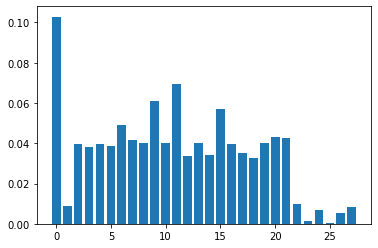

In [31]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

### ExtraTreesClassifier - balanced and scaled data set.

In [32]:
# ExtraTrees Classifier
from sklearn.ensemble import ExtraTreesClassifier
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, random_state=45)
# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# clf = ExtraTreesClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
# print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

clf = ExtraTreesClassifier(random_state=45, n_estimators=50).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.9917761893782184


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

print('Test Acc: %.3f' % clf.score(X_test, y_test))

y_true = y_test
y_pred = clf.predict(X_test)

print(confusion_matrix(y_true, y_pred))

print(classification_report(y_true, y_pred))


Test Acc: 0.992
[[12869   214]
 [    0 12939]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     13083
           1       0.98      1.00      0.99     12939

    accuracy                           0.99     26022
   macro avg       0.99      0.99      0.99     26022
weighted avg       0.99      0.99      0.99     26022



### KNN - balanced and scaled data set.

k: 1, Train/Test Score: 1.000/0.974
k: 3, Train/Test Score: 0.974/0.951
k: 5, Train/Test Score: 0.952/0.930
k: 7, Train/Test Score: 0.932/0.911
k: 9, Train/Test Score: 0.914/0.891


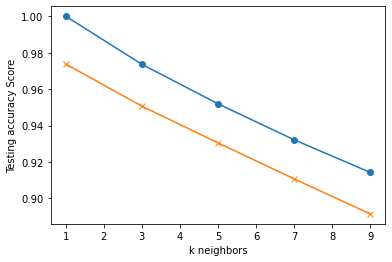

In [33]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

y_true = y_test
y_pred = knn.predict(X_test_scaled)

confusion_matrix(y_true, y_pred)

print(classification_report(y_true, y_pred))


k=3 Test Acc: 0.951
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     12967
           1       0.91      1.00      0.95     13055

    accuracy                           0.95     26022
   macro avg       0.95      0.95      0.95     26022
weighted avg       0.95      0.95      0.95     26022

